#### Import all the necessary libraries


This file contains all the deep learning model 

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM,Bidirectional,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Embedding,Flatten,Dense,Dropout
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import asarray,zeros


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
file_path = "/content/drive/My Drive/clean_data_capstoneV4.csv"
df = pd.read_csv(file_path,encoding='utf8', engine='python')
df.head(10)


,clean_Short_desc,clean_Description,Assignment group
0,login issue,verified detail employee manager check ad rese...,GRP_0
1,log to vpn,receive log to vpn best,GRP_0
2,unable to access hr_tool page,unable to access hr_tool page,GRP_0
3,unable to log to engineering tool skype,unable to log to engineering tool skype,GRP_0
4,event critical hostname_221 com value mountpoi...,event critical hostname_221 com value mountpoi...,GRP_1
5,ticket_no1550391 employment status new non emp...,ticket_no1550391 employment status new non emp...,GRP_0
6,unable to disable add outlook,unable to disable add outlook,GRP_0
7,ticket update inplant_874773,ticket update inplant_874773,GRP_0
8,engineering tool say connect unable to submit ...,engineering tool say connect unable to submit ...,GRP_0
9,hr_tool site load page correctly,hr_tool site load page correctly,GRP_0


### Checking the length for the different columns

Maximum length of Short Description 141
Minimum length of Short Description 2
Median length of Short Description 32.0
Average length of Short Description 36.84751710826461
Standard Deviation of Short Description 18.695500979215563


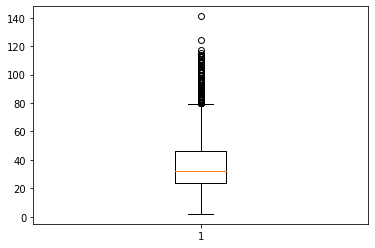

In [4]:
import matplotlib.pyplot as plt

text_length = []

for text in range(len(df['clean_Short_desc'])):
    try:
        text_length.append(len(df['clean_Short_desc'][text]))

    except Exception as e:
        pass

print("Maximum length of Short Description", max(text_length))
print("Minimum length of Short Description", min(text_length))
print("Median length of Short Description",np.median(text_length))
print("Average length of Short Description",np.mean(text_length))
print("Standard Deviation of Short Description",np.std(text_length))

plt.boxplot(text_length)
plt.show()

Maximum length of  Description 5940
Minimum length of  Description 2
Median length of  Description 51.0
Average length of  Description 132.03070714160378
Standard Deviation of  Description 326.35809931521294


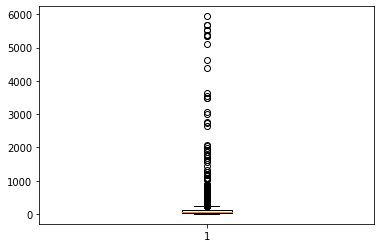

In [5]:
import matplotlib.pyplot as plt

text_length = []

for text in range(len(df['clean_Description'])):
    try:
        text_length.append(len(df['clean_Description'][text]))

    except Exception as e:
        pass

print("Maximum length of  Description", max(text_length))
print("Minimum length of  Description", min(text_length))
print("Median length of  Description", np.median(text_length))
print("Average length of  Description",np.mean(text_length))
print("Standard Deviation of  Description",np.std(text_length))
plt.boxplot(text_length)
plt.show()

### Deep Neural Network Model by combining both the column into one 


In [6]:
df['MergedColumn'] = df[df.columns[0:2]].apply(
    lambda x: ' '.join(x.astype(str)),
    axis=1
)

data_df = df.drop(['clean_Short_desc','clean_Description'],axis=1)
data_df.head()

,Assignment group,MergedColumn
0,GRP_0,login issue verified detail employee manager c...
1,GRP_0,log to vpn receive log to vpn best
2,GRP_0,unable to access hr_tool page unable to access...
3,GRP_0,unable to log to engineering tool skype unable...
4,GRP_1,event critical hostname_221 com value mountpoi...


### Using TFidf Vectorizer for Merged columns



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tokenize and build vocab
tfidf = TfidfVectorizer(max_features=5000,min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_df=0.7)
X = tfidf.fit_transform(data_df.MergedColumn).toarray()


print((tfidf.vocabulary_))
print("length of the vocabulary ",len(tfidf.vocabulary_))

y = np.asarray(data_df['Assignment group'])
y = pd.get_dummies(data_df['Assignment group']).values
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

{'login': 1908, 'issue': 1643, 'verified': 3547, 'employee': 976, 'manager': 1978, 'check': 473, 'ad': 122, 'reset': 2799, 'password': 2343, 'advise': 148, 'caller': 433, 'confirm': 589, 'able': 23, 'resolve': 2817, 'login issue': 1919, 'employee manager': 977, 'manager check': 1979, 'check ad': 475, 'ad reset': 124, 'reset password': 2805, 'password advise': 2346, 'advise login': 151, 'login check': 1909, 'check caller': 476, 'caller confirm': 434, 'confirm able': 590, 'able login': 30, 'issue resolve': 1664, 'log': 1894, 'vpn': 3588, 'receive': 2663, 'best': 349, 'log vpn': 1905, 'vpn receive': 3595, 'unable': 3432, 'access': 47, 'hr_tool': 1462, 'page': 2333, 'unable access': 3433, 'access hr_tool': 61, 'engineering': 994, 'tool': 3355, 'skype': 3058, 'unable log': 3441, 'engineering tool': 995, 'skype unable': 3064, 'event': 1119, 'critical': 680, 'com': 534, 'value': 3536, 'threshold': 3308, 'oracle': 2269, 'employment': 979, 'status': 3159, 'new': 2154, 'non': 2175, 'enter': 1008

In [8]:
model = Sequential() 
model.add(Dense(100, activation='softmax',input_shape=(x_train[0].shape)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.add(Dense(66, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               373800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 66)                6666      
Total params: 390,566
Trainable params: 390,566
Non-trainable params: 0
_________________________________________________________________
None


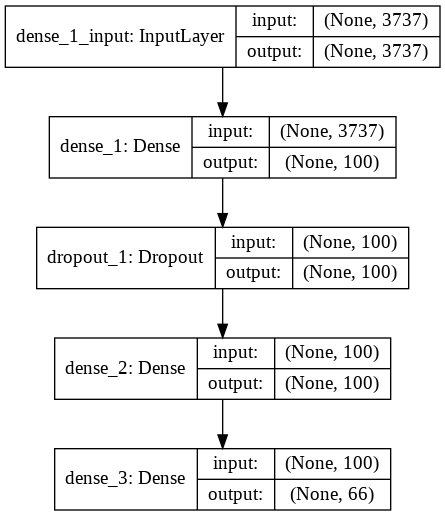

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [16]:
history= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=64)

Train on 4559 samples, validate on 1140 samples
Epoch 1/30
4559/4559 [==============================] - 1s 155us/step - loss: 2.4464 - accuracy: 0.4361 - val_loss: 2.4630 - val_accuracy: 0.4281
Epoch 2/30
4559/4559 [==============================] - 1s 150us/step - loss: 2.3996 - accuracy: 0.4709 - val_loss: 2.4164 - val_accuracy: 0.4825
Epoch 3/30
4559/4559 [==============================] - 1s 150us/step - loss: 2.3568 - accuracy: 0.5124 - val_loss: 2.3768 - val_accuracy: 0.5105
Epoch 4/30
4559/4559 [==============================] - 1s 154us/step - loss: 2.3231 - accuracy: 0.5157 - val_loss: 2.3435 - val_accuracy: 0.5211
Epoch 5/30
4559/4559 [==============================] - 1s 152us/step - loss: 2.2971 - accuracy: 0.5170 - val_loss: 2.3156 - val_accuracy: 0.5237
Epoch 6/30
4559/4559 [==============================] - 1s 151us/step - loss: 2.2713 - accuracy: 0.5196 - val_loss: 2.2920 - val_accuracy: 0.5254
Epoch 7/30
4559/4559 [==============================] - 1s 147us/step - loss

In [17]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 53.421050


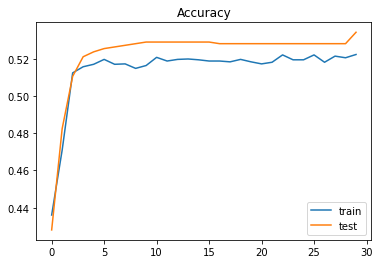

In [18]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

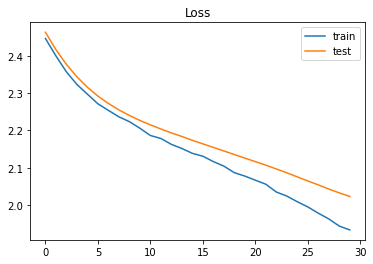

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

## LSTM Models 


In [20]:
X = df.drop('Assignment group', axis=1)

y = df['Assignment group']

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Training Set Shape :", X_train.shape)
print("Test Set Shape :", X_test.shape)
print("Training Set Label Shape :", y_train.shape)
print("Test Set Label Shape :", y_test.shape)

Training Set Shape : (4559, 3)
Test Set Shape : (1140, 3)
Training Set Label Shape : (4559, 66)
Test Set Label Shape : (1140, 66)


#### Preparing the data for Encoder Encoder Architecture

In [21]:
#Creating the data for short desc 
X1_train = []
sentences = list(X_train["clean_Short_desc"])
for sen in sentences:
    X1_train.append((str(sen)))

X1_test = []
sentences = list(X_test["clean_Short_desc"])
for sen in sentences:
    X1_test.append((str(sen)))


#Creating the data for Description 
X2_train = []
sentences = list(X_train["clean_Description"])
for sen in sentences:
    X2_train.append((str(sen)))

X2_test = []
sentences = list(X_test["clean_Description"])
for sen in sentences:
    X2_test.append((str(sen)))

In [22]:
max = 1
maxindex = 0;
lengthsdf = pd.DataFrame()
for ind in df.index:
  if len(df['clean_Short_desc'][ind]) > max:
    max = len(df['clean_Short_desc'][ind])
    maxindex = ind
print(max)

141


In [23]:
max_features = max
maxlen = 40 
embedding_size = 200
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X1_train))

X1_train = tokenizer.texts_to_sequences(list(X1_train))
X1_test = tokenizer.texts_to_sequences(list(X1_test))

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

print("Training Set Shape :", X1_train.shape)
print("Test Set Shape :", X1_test.shape)

Training Set Shape : (4559, 40)
Test Set Shape : (1140, 40)


In [24]:

# Word Embeddings
from numpy import array
from numpy import asarray
from numpy import zeros


embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/glove.6B.200d.txt', encoding="utf8")
#glove_file = open('glove.6B.200d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()
num_words = len(tokenizer.word_index) + 1
embedding_matrix = zeros((num_words, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


print(len(embeddings_dictionary.values()))
print("Num words",num_words)
print("matrix size ",embedding_matrix.shape)
print("embeddings ",embedding_size)
print("Max len",maxlen)

400000
Num words 3894
matrix size  (3894, 200)
embeddings  200
Max len 40


### Encoder Encoder LSTM Architecture


#### Input layer 1


In [25]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(num_words, 200, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1 = LSTM(100)(embedding_layer)

In [26]:
max1 = 1
maxindex = 0;
lengthsdf = pd.DataFrame()
for ind in df.index:
  if len(df['clean_Description'][ind]) > max1:
    max1 = len(df['clean_Description'][ind])
    maxindex = ind
print(max1)

5940


In [27]:
max_features = max1
maxlen = 200 
embedding_size = 200
tokenizer1 = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer1.fit_on_texts(list(X2_train))

X2_train = tokenizer1.texts_to_sequences(list(X2_train))
X2_test = tokenizer1.texts_to_sequences(list(X2_test))

X2_train = pad_sequences(X2_train, padding='post', maxlen=maxlen)
X2_test = pad_sequences(X2_test, padding='post', maxlen=maxlen)




In [28]:
print("Training Set Shape :", X2_train.shape)
print("Test Set Shape :", X2_test.shape)

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/glove.6B.200d.txt', encoding="utf8")
#glove_file = open('glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()
num_words1 = len(tokenizer1.word_index) + 1
embedding_matrix2 = zeros((num_words1, 200))
for word, index in tokenizer1.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix2[index] = embedding_vector


print(len(embeddings_dictionary.values()))
print("Num words",num_words1)
print("matrix size ",embedding_matrix2.shape)
print("embeddings ",embedding_size)
print("Max len",maxlen)


Training Set Shape : (4559, 200)
Test Set Shape : (1140, 200)
400000
Num words 8748
matrix size  (8748, 200)
embeddings  200
Max len 200


#### Input layer 2


In [29]:
input_2 = Input(shape=(maxlen,))
embedding_layer2 = Embedding(num_words1, 200, weights=[embedding_matrix2], trainable=False)(input_2)
LSTM_Layer_2 = LSTM(100)(embedding_layer2)

### Merging both the layers


In [30]:
concat_layer = Concatenate()([LSTM_Layer_1, LSTM_Layer_2])
#dense_layer_3 = Dense(10, activation='relu')(concat_layer)

output = Dense(66, activation='softmax')(concat_layer)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#categorical
#softmax

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 200)      778800      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 200, 200)     1749600     input_2[0][0]                    
____________________________________________________________________________________________

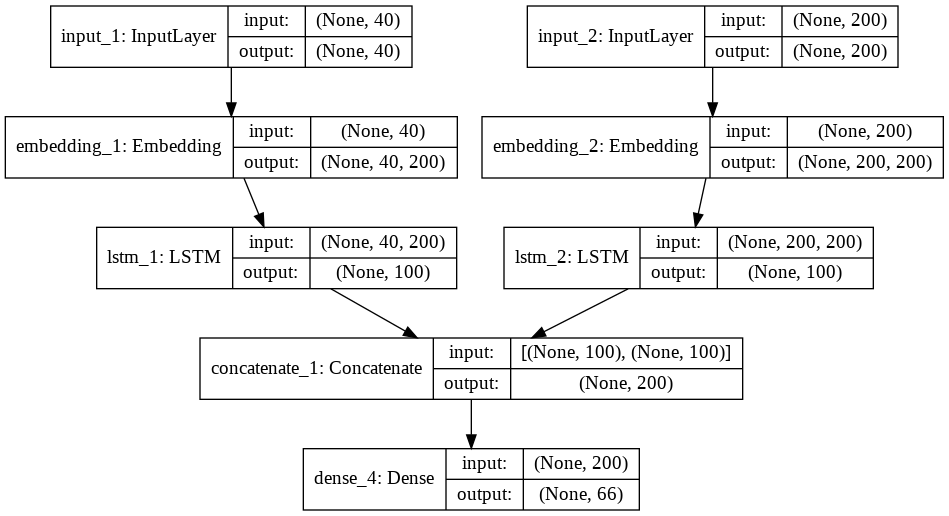

In [32]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [33]:
history = model.fit(x=[X1_train, X2_train], y=y_train, batch_size=64, epochs=30, verbose=1, validation_split=0.1)


Train on 4103 samples, validate on 456 samples
Epoch 1/30
4103/4103 [==============================] - 29s 7ms/step - loss: 2.8748 - accuracy: 0.4307 - val_loss: 2.5554 - val_accuracy: 0.4320
Epoch 2/30
4103/4103 [==============================] - 28s 7ms/step - loss: 2.5609 - accuracy: 0.4389 - val_loss: 2.5623 - val_accuracy: 0.4342
Epoch 3/30
4103/4103 [==============================] - 28s 7ms/step - loss: 2.5562 - accuracy: 0.4397 - val_loss: 2.5551 - val_accuracy: 0.4342
Epoch 4/30
4103/4103 [==============================] - 28s 7ms/step - loss: 2.5564 - accuracy: 0.4397 - val_loss: 2.5654 - val_accuracy: 0.4342
Epoch 5/30
4103/4103 [==============================] - 28s 7ms/step - loss: 2.5584 - accuracy: 0.4397 - val_loss: 2.5515 - val_accuracy: 0.4364
Epoch 6/30
4103/4103 [==============================] - 28s 7ms/step - loss: 2.5519 - accuracy: 0.4404 - val_loss: 2.5551 - val_accuracy: 0.4364
Epoch 7/30
4103/4103 [==============================] - 28s 7ms/step - loss: 2.5506

In [35]:

loss, accuracy = model.evaluate([X1_test,X2_test], y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 53.070176


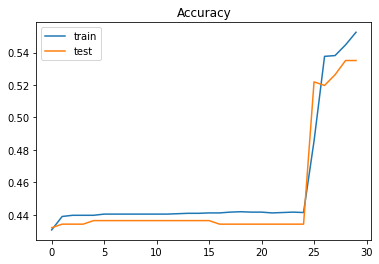

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

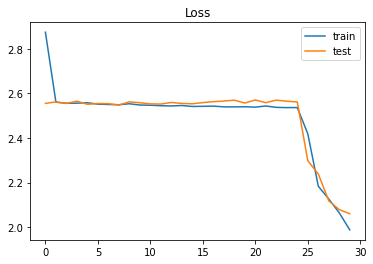

In [37]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

#### LSTM Model 


In [38]:
max = 1
maxindex = 0;
lengthsdf = pd.DataFrame()
for ind in df.index:
  if len(data_df['MergedColumn'][ind]) > max:
    max = len(data_df['MergedColumn'][ind])
    maxindex = ind
print(max)

6016


In [39]:

max_features = max
maxlen = 200 
embedding_size = 200
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data_df['MergedColumn'])
X = tokenizer.texts_to_sequences(df['MergedColumn'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['Assignment group'])
y = pd.get_dummies(df['Assignment group']).values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Extract the GloVe embedding file

In [40]:
embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/glove.6B.200d.txt', encoding="utf8")
#glove_file = open('glove.6B.200d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()
num_words = len(tokenizer.word_index) + 1
embedding_matrix = zeros((num_words, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


print(len(embeddings_dictionary.values()))
print("Num words",num_words)
print("matrix size ",embedding_matrix.shape)
print("embeddings size ",embedding_size)
print("Max len",maxlen)

400000
Num words 10391
matrix size  (10391, 200)
embeddings size  200
Max len 200


In [41]:
### LSTM
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(66, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         2078200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_5 (Dense)              (None, 66)                6666      
Total params: 2,205,266
Trainable params: 2,205,266
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
epochs = 30
batch_size = 64 
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4103 samples, validate on 456 samples
Epoch 1/30
4103/4103 [==============================] - 32s 8ms/step - loss: 2.5317 - accuracy: 0.4821 - val_loss: 2.1269 - val_accuracy: 0.5197
Epoch 2/30
4103/4103 [==============================] - 31s 8ms/step - loss: 1.9735 - accuracy: 0.5423 - val_loss: 1.9478 - val_accuracy: 0.5482
Epoch 3/30
4103/4103 [==============================] - 31s 8ms/step - loss: 1.7718 - accuracy: 0.5730 - val_loss: 1.7961 - val_accuracy: 0.5636
Epoch 4/30
4103/4103 [==============================] - 31s 8ms/step - loss: 1.5984 - accuracy: 0.6154 - val_loss: 1.6764 - val_accuracy: 0.6031
Epoch 5/30
4103/4103 [==============================] - 31s 8ms/step - loss: 1.4115 - accuracy: 0.6522 - val_loss: 1.6049 - val_accuracy: 0.6118
Epoch 6/30
4103/4103 [==============================] - 34s 8ms/step - loss: 1.2475 - accuracy: 0.6868 - val_loss: 1.5341 - val_accuracy: 0.6206
Epoch 7/30
4103/4103 [==============================] - 32s 8ms/step - loss: 1.1184

In [43]:

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 66.052634


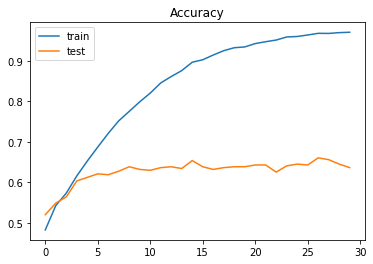

In [44]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

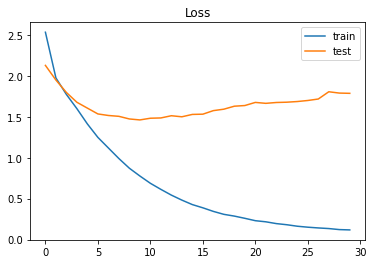

In [45]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

Stacked LSTM model 


In [46]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(66, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         2078200   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 200)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 100)         120400    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 66)                6666      
Total params: 2,285,666
Trainable params: 2,285,666
Non-trainable params: 0
_________________________________________________________________
None


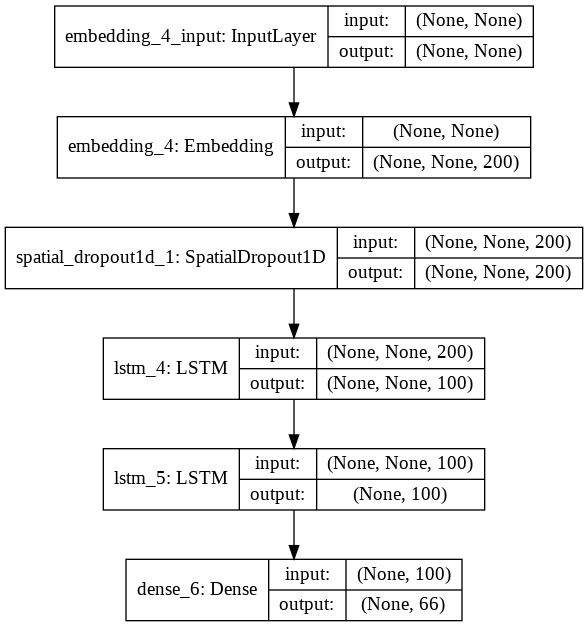

In [47]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

Train the model

In [49]:
epochs = 30
batch_size = 64 
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4103 samples, validate on 456 samples
Epoch 1/30
4103/4103 [==============================] - 52s 13ms/step - loss: 2.6510 - accuracy: 0.4628 - val_loss: 2.2611 - val_accuracy: 0.5088
Epoch 2/30
4103/4103 [==============================] - 51s 13ms/step - loss: 2.0859 - accuracy: 0.5367 - val_loss: 2.0284 - val_accuracy: 0.5307
Epoch 3/30
4103/4103 [==============================] - 51s 12ms/step - loss: 1.9126 - accuracy: 0.5462 - val_loss: 1.9134 - val_accuracy: 0.5439
Epoch 4/30
4103/4103 [==============================] - 52s 13ms/step - loss: 1.7763 - accuracy: 0.5730 - val_loss: 1.8086 - val_accuracy: 0.5658
Epoch 5/30
4103/4103 [==============================] - 51s 12ms/step - loss: 1.6370 - accuracy: 0.5966 - val_loss: 1.7004 - val_accuracy: 0.5789
Epoch 6/30
4103/4103 [==============================] - 52s 13ms/step - loss: 1.5100 - accuracy: 0.6308 - val_loss: 1.6399 - val_accuracy: 0.6096
Epoch 7/30
4103/4103 [==============================] - 51s 13ms/step - loss:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 62.927258


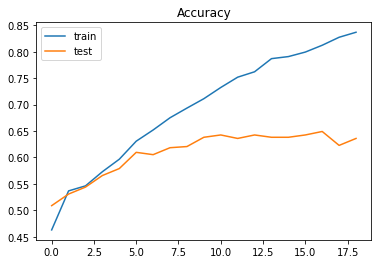

In [50]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();


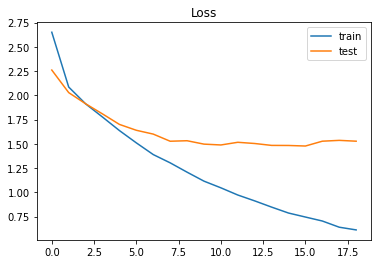

In [51]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
## We should also consider combining the data and model building as we can see in 30epochs accuracy is 85% accurac



### Hypertuning LSTM model

Tried with increasing the number of epochs 


In [54]:
# Epohs incresed
epochs = 100
batch_size = 64 
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4103 samples, validate on 456 samples
Epoch 1/100
4103/4103 [==============================] - 32s 8ms/step - loss: 2.5810 - accuracy: 0.4782 - val_loss: 2.1092 - val_accuracy: 0.5219
Epoch 2/100
4103/4103 [==============================] - 32s 8ms/step - loss: 1.9721 - accuracy: 0.5442 - val_loss: 1.9241 - val_accuracy: 0.5351
Epoch 3/100
4103/4103 [==============================] - 32s 8ms/step - loss: 1.7688 - accuracy: 0.5757 - val_loss: 1.7839 - val_accuracy: 0.5724
Epoch 4/100
4103/4103 [==============================] - 32s 8ms/step - loss: 1.5643 - accuracy: 0.6193 - val_loss: 1.6337 - val_accuracy: 0.5965
Epoch 5/100
4103/4103 [==============================] - 32s 8ms/step - loss: 1.4073 - accuracy: 0.6515 - val_loss: 1.5592 - val_accuracy: 0.6272
Epoch 6/100
4103/4103 [==============================] - 32s 8ms/step - loss: 1.2579 - accuracy: 0.6871 - val_loss: 1.5343 - val_accuracy: 0.6228
Epoch 7/100
4103/4103 [==============================] - 32s 8ms/step - loss:

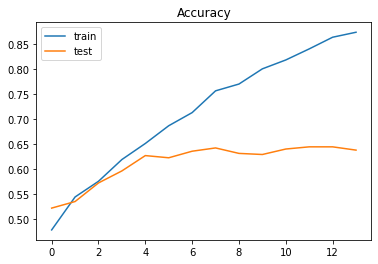

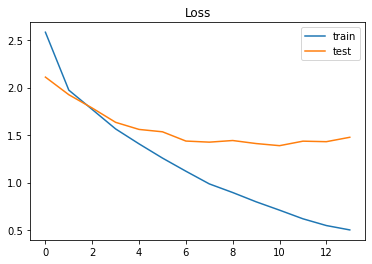

In [55]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();


plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

The model training stops after 14 epochs as there is no decrease is validation loss

In [56]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(66, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 200)         2078200   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, None, 200)         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 100)         120400    
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 66)                6666      
Total params: 2,285,666
Trainable params: 2,285,666
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
# Checking with different number of epochs and batch size
epochs = 50
batch_size = 128 
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4103 samples, validate on 456 samples
Epoch 1/50
4103/4103 [==============================] - 50s 12ms/step - loss: 2.9256 - accuracy: 0.4280 - val_loss: 2.3091 - val_accuracy: 0.5197
Epoch 2/50
4103/4103 [==============================] - 50s 12ms/step - loss: 2.1820 - accuracy: 0.5313 - val_loss: 2.1433 - val_accuracy: 0.5154
Epoch 3/50
4103/4103 [==============================] - 50s 12ms/step - loss: 2.0264 - accuracy: 0.5372 - val_loss: 1.9919 - val_accuracy: 0.5285
Epoch 4/50
4103/4103 [==============================] - 49s 12ms/step - loss: 1.9206 - accuracy: 0.5428 - val_loss: 1.9289 - val_accuracy: 0.5307
Epoch 5/50
4103/4103 [==============================] - 50s 12ms/step - loss: 1.8313 - accuracy: 0.5540 - val_loss: 1.8814 - val_accuracy: 0.5373
Epoch 6/50
4103/4103 [==============================] - 53s 13ms/step - loss: 1.7472 - accuracy: 0.5740 - val_loss: 1.8274 - val_accuracy: 0.5504
Epoch 7/50
4103/4103 [==============================] - 49s 12ms/step - loss:

In [61]:

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 63.684213


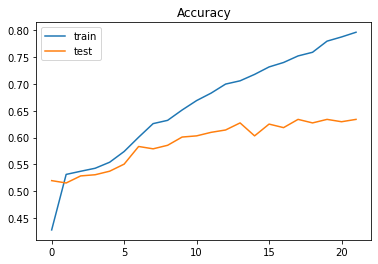

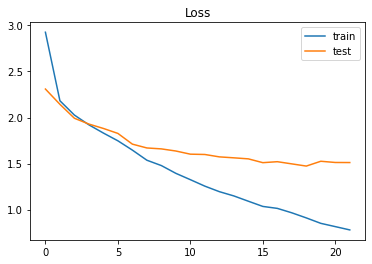

In [62]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();


plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
# Conclusion
